In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

### Generate classification data

In [2]:
X, y = make_moons(n_samples=20000, noise=0.01, random_state=0)
dataset = np.column_stack([X, y])
dataset = dataset[dataset[:, 1].argsort()]
dataset = dataset[dataset[:, 0].argsort(kind='mergesort')]

train_dataset, test_dataset = train_test_split(dataset, random_state=42, test_size=0.15)

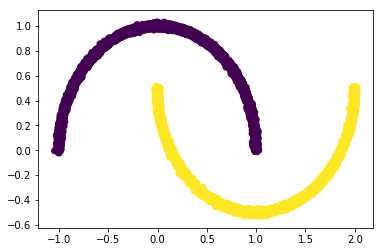

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:, 2]);

In [4]:
np.savetxt("train_classification_dataset.csv", train_dataset, delimiter=",", header="x, y, class")
np.savetxt("test_classification_dataset.csv", test_dataset, delimiter=",", header="x, y, class")

### Generate data for Regression

In [5]:
class1_data = dataset[dataset[:, 2] == True]
class2_data = dataset[dataset[:, 2] == False]

regression_dataset = []
a = np.array([0, 1500, 3000])
inputs = class1_data[:, :2]
for i in range(class1_data.shape[0] - 3000):
    regression_dataset.append(inputs[a + i].ravel())

inputs = class2_data[:, :2]
for i in range(class1_data.shape[0] - 3000):
    regression_dataset.append(inputs[a + i].ravel())
    
regression_dataset = np.array(regression_dataset)

In [6]:
train_dataset, test_dataset = train_test_split(regression_dataset, random_state=42, test_size=0.15)

In [7]:
np.savetxt("train_regression_dataset.csv", train_dataset, delimiter=",", header="x1, y1, x2, y2, x_target, y_target")
np.savetxt("test_regression_dataset.csv", test_dataset, delimiter=",", header="x1, y1, x2, y2, x_target, y_target")